9.5 Newton method for approximate total variation de-noising

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.autograd import grad
from torch.autograd.functional import hessian

In [4]:
# n, EPSILON, MU, xcor
n = 5000
EPSILON = 0.001
MU = 50
xcor = torch.tensor([0.98918588,
0.95836039,
1.00313331,
1.00719191,
0.97133822,
1.02977289,
1.02972911,
0.99905917,
1.00818231,
1.00436598,
0.99533229,
1.01814476,
0.98529209,
1.05457965,
0.99659010,
1.00284828,
1.02666921,
1.00148204,
0.99760879,
0.97919126,
1.00736027,
0.96659545,
1.01785811,
1.04058905,
0.98270561,
1.02144992,
1.03135004,
0.96015676,
0.96397589,
1.01427869,
0.99000286,
1.01724993,
1.02039056,
1.01779771,
1.03225624,
1.01671501,
1.02977095,
0.96993857,
0.99950526,
0.99608207,
0.95989786,
1.00643261,
0.97358818,
1.03537854,
0.97987274,
1.01321858,
1.00548302,
0.97695246,
0.94573314,
0.99852030,
0.97473416,
1.01536158,
1.01269352,
1.04231075,
1.01478206,
0.98391012,
1.00950843,
0.97477211,
0.99951223,
0.99879448,
1.00000108,
0.99205351,
1.02737509,
0.95315024,
1.01070458,
1.02239096,
1.01827393,
1.01444643,
1.00100785,
1.01692723,
1.01422251,
0.99360886,
0.99056328,
0.99260282,
0.96312164,
0.99414990,
1.00296112,
1.00787023,
1.03608771,
0.99122563,
1.01558085,
1.01997622,
1.02352225,
0.97519771,
1.00530088,
1.00594705,
0.97480592,
0.98144888,
1.02705737,
0.99671251,
1.00974701,
1.00219968,
0.98411337,
0.98601067,
1.01109134,
0.97625241,
1.01952954,
1.01422402,
0.97945714,
0.99335983,
0.97030557,
0.94494198,
1.02465843,
0.98703412,
1.00818419,
1.00585143,
1.00053665,
0.97490139,
0.97632135,
0.99063927,
0.97035284,
0.97360243,
1.03681200,
1.00139360,
0.96956706,
0.99896932,
0.97179140,
0.96626806,
0.99347246,
1.02383664,
1.00321611,
1.01641169,
0.97080452,
0.98848487,
0.99343900,
0.96967120,
0.96701408,
1.02328044,
1.00028112,
0.98387135,
1.02014322,
1.00579065,
0.97525601,
1.03348964,
1.00723755,
1.03697293,
1.02845070,
0.98289654,
0.96770160,
0.99817684,
0.99173503,
0.97890931,
1.01244424,
1.03721226,
0.98633810,
0.97883105,
0.99384159,
1.01657560,
0.97864507,
0.96996713,
0.99700326,
0.99836765,
1.01213239,
0.98511273,
0.99625831,
0.98913120,
0.99801674,
1.03837881,
0.98483793,
0.96631593,
1.01173458,
0.97741083,
1.00089699,
0.98431172,
1.01338495,
1.01382209,
0.99490774,
0.94864188,
1.00331402,
1.03982352,
1.02546029,
0.96048994,
0.99803345,
0.98295858,
0.97438617,
0.96914116,
1.00722018,
0.98926742,
1.00139503,
0.99080316,
0.98837567,
1.00927401,
1.01820707,
1.05280400,
0.96606756,
0.97443475,
1.02594585,
0.99025501,
0.96546836,
1.00788857,
1.03883106,
1.01769735,
1.04893462,
1.01261356,
1.04661323,
0.99150471,
0.97150551,
0.99472191,
1.02975612,
0.97209478,
1.01588185,
0.98496470,
1.01377962,
0.97250399,
1.00214976,
0.94988592,
0.98767280,
1.01155120,
0.99197488,
1.03091389,
0.98421801,
0.94186972,
0.96920909,
1.02639121,
0.99716940,
1.00948059,
1.02360499,
0.94698933,
0.98388303,
0.98239246,
0.97454657,
0.99544795,
1.03802533,
0.99903903,
1.03068620,
0.98259488,
1.00018811,
0.98042767,
1.01467346,
0.99371982,
1.01200340,
1.01670388,
0.99804197,
1.02222932,
1.05773219,
1.01311597,
0.99970532,
1.02282852,
1.00139852,
0.97232325,
1.01213744,
0.99987487,
0.99309455,
1.03191131,
1.04658502,
0.98693602,
1.00258561,
0.97980877,
1.01701096,
0.94088525,
1.02475287,
1.00547248,
1.00654156,
1.03033611,
0.99313333,
0.99667164,
0.96823749,
0.95840984,
0.98241114,
1.00702201,
0.98646977,
0.96666173,
1.02681716,
0.98219786,
0.99971786,
0.99997957,
0.99376409,
1.00991438,
0.99339967,
0.95839973,
0.97427562,
1.00607737,
0.96858525,
0.99132042,
0.97646570,
0.97063599,
0.97447146,
0.98995833,
1.00434164,
0.99709704,
1.02660298,
0.99386534,
0.96206152,
1.00024335,
1.00178432,
1.00791340,
1.01249564,
1.03195210,
0.98630460,
1.00652021,
0.99967058,
0.98549340,
1.05340771,
0.99355957,
0.96476179,
1.04425252,
1.00813865,
0.97202401,
1.01550875,
1.03174455,
0.97759894,
1.00337939,
0.99652400,
0.97091512,
1.02959299,
0.99961426,
1.01340547,
0.98208928,
0.98361102,
1.00785907,
1.00267035,
1.04620541,
0.99312236,
1.05531385,
1.03771314,
0.95137304,
0.95798643,
0.98566165,
0.99535459,
1.00022335,
1.02092375,
0.98194323,
0.98196274,
0.99497048,
0.99948840,
1.00697225,
1.02645737,
1.01554183,
0.95623462,
1.01743369,
1.02028715,
1.01590862,
1.03275201,
1.00817744,
0.98317517,
0.99626681,
0.93877456,
1.01183214,
1.00292364,
0.98522240,
0.98363231,
0.97298345,
0.99880673,
1.00948361,
0.99174097,
0.98750254,
0.99910053,
0.99563099,
0.97606837,
1.03231370,
1.01102274,
1.03202352,
0.98755675,
0.97203208,
1.02019124,
1.00102999,
0.98109478,
0.99777177,
0.94977874,
1.02709795,
0.97547024,
0.98278778,
1.03348699,
0.97726892,
0.98967856,
0.98734592,
1.04049369,
1.00202252,
0.97297359,
0.97188705,
1.04339191,
1.04843646,
1.04087671,
0.96860150,
0.99466156,
0.99502670,
1.00768748,
0.98569186,
0.97555879,
0.98882976,
1.02705230,
1.05931620,
1.00573221,
0.99333442,
1.01754180,
0.98781024,
1.04656199,
1.02767128,
0.96931086,
0.98325287,
1.03352324,
1.00970208,
1.00982647,
0.95731666,
1.00569647,
1.01714082,
0.98408025,
0.97493486,
0.99535948,
0.97364918,
0.99821151,
1.00697996,
1.03433188,
1.00449603,
0.98644959,
1.04085476,
1.02063038,
1.00576903,
1.01679085,
0.98729805,
1.02140879,
1.00671259,
1.01562438,
0.97381655,
1.03839176,
1.01086064,
0.95207160,
1.01174849,
1.03185878,
1.01596356,
1.03451956,
1.03299607,
0.97726427,
0.94235987,
1.04471826,
1.00976995,
1.00050809,
0.98985057,
0.96162764,
1.00553433,
0.96563803,
0.97901786,
0.99478394,
1.01889782,
1.00939336,
0.96636468,
1.03704691,
1.00081840,
1.04676132,
0.96977524,
0.98043420,
0.98081754,
0.99732000,
0.97557358,
0.97590030,
0.94052069,
0.97904530,
1.00643364,
0.99540415,
2.42100355,
2.42226921,
2.42940613,
2.41266377,
2.40756702,
2.43789804,
2.41467089,
2.43092226,
2.40120650,
2.42154286,
2.44380738,
0.97773760,
1.00347655,
0.99409639,
0.99811352,
0.99103570,
0.94805913,
0.99641136,
1.03483354,
1.01629510,
0.99057166,
0.98346392,
1.00622395,
0.99041210,
0.98678800,
1.00138471,
1.03134421,
0.93699991,
1.01462140,
0.97479839,
1.02360712,
0.93940107,
0.99440421,
1.00145175,
0.98938465,
0.99492705,
0.96217308,
0.97184120,
0.97962495,
1.00916536,
0.98534733,
1.03843523,
1.00350179,
0.95343083,
0.98864517,
0.98369815,
1.00258295,
0.99448421,
0.99302392,
0.98165845,
0.99838666,
0.96389990,
1.01530851,
0.96691243,
0.98346058,
0.99634714,
1.00620212,
0.99808419,
1.04345425,
1.04054930,
1.01566090,
1.00229534,
0.97980982,
0.98846657,
0.96485077,
0.99063676,
0.98822722,
1.04378239,
1.01883062,
1.00162473,
0.99268089,
1.00207057,
1.01915479,
1.05592125,
1.00817217,
1.02158260,
1.01698467,
1.01386894,
1.02504076,
1.03148413,
1.00110378,
0.99214656,
1.00566769,
1.02491730,
1.03039779,
0.98643244,
1.02280571,
0.99569647,
0.99160113,
1.01353717,
1.02330278,
0.98574368,
0.96253487,
0.99874136,
1.01382562,
1.00208745,
1.03943809,
0.99173064,
1.01987887,
0.98038000,
0.96842196,
1.01666637,
0.96518419,
0.96748594,
0.98487445,
0.96278589,
1.01396357,
0.99306614,
0.96765788,
0.97778912,
0.97533700,
0.99820956,
0.93963523,
0.98264127,
0.96521527,
1.00824119,
1.01496361,
1.00367938,
0.99746403,
0.93412548,
1.00070134,
0.97809225,
0.99336306,
0.99181055,
0.97104381,
1.01450133,
1.00599389,
0.99122788,
1.02230246,
1.03945747,
0.97229565,
0.99935172,
0.97223431,
1.01877085,
1.01250418,
0.98706848,
0.98601976,
0.98116573,
1.02314532,
0.99378699,
0.99625414,
0.96853962,
1.00781550,
1.06725692,
1.00724241,
0.96442992,
1.00616964,
0.96410568,
1.00371433,
0.95767319,
1.01797971,
1.02854432,
1.03879841,
1.03459075,
0.98104769,
1.01106657,
1.02277745,
0.97314786,
1.00504405,
1.01907158,
0.96779532,
0.97617595,
1.01945436,
0.99984172,
1.01311217,
1.03410679,
1.01205098,
0.98032335,
1.01879998,
0.99582780,
0.97959430,
1.05235163,
1.00200381,
0.97656762,
1.01589347,
1.04205070,
1.01484085,
1.01975382,
1.00263135,
0.99603554,
1.02177269,
0.99513103,
1.00188686,
0.98683413,
0.98286289,
0.99329031,
0.97029135,
1.00621447,
1.00256129,
0.99897483,
0.94381044,
0.98723059,
1.00623107,
1.00922992,
1.00447992,
0.99906791,
0.95991725,
1.00848430,
0.99672163,
1.01212974,
1.01496877,
0.99784923,
1.00813230,
0.99162142,
0.99193877,
0.99044065,
0.97616573,
1.00583939,
1.03088112,
0.98553671,
0.98746157,
1.01807159,
1.00098746,
1.03853197,
0.95747368,
0.97415647,
0.98090731,
1.05441065,
1.01079030,
0.98890587,
1.00074990,
0.99210823,
1.02444614,
1.00045737,
1.02044907,
1.01755853,
0.99421824,
0.99715776,
1.00319851,
0.98001476,
0.99403470,
0.99776342,
0.97441840,
1.02343845,
0.97170702,
0.98223245,
0.97076248,
1.02663593,
0.98299016,
0.95685568,
1.02032999,
1.03604667,
1.01680681,
1.00346662,
0.97851165,
0.98119374,
1.03074038,
1.02876886,
0.98479937,
1.02015395,
1.00542832,
0.99066347,
0.97919924,
1.00717166,
0.95452771,
0.96067371,
1.05039164,
0.99820045,
1.06572274,
0.99391708,
1.00433191,
1.02308018,
0.99553618,
0.98695738,
1.03579905,
0.97824706,
1.02018854,
0.98723413,
1.01858785,
1.02119746,
0.97925248,
1.01332486,
1.02582121,
0.97369940,
1.00905284,
0.99908033,
0.96930911,
0.99312253,
0.99598912,
0.97291063,
0.95114468,
0.97726282,
0.99986053,
0.95691275,
1.03157693,
0.98498917,
0.94840188,
1.00277277,
1.03719036,
1.00132505,
1.00404952,
0.99932805,
1.00433940,
1.02205419,
1.00455736,
1.01888239,
1.01270086,
1.00329700,
1.00700260,
0.97542881,
0.97639781,
0.99967356,
1.00885863,
0.97763228,
1.02030278,
1.00273843,
1.06829110,
1.01027698,
0.96732845,
1.00959516,
1.01248759,
0.98723036,
1.00587305,
0.98505437,
1.00051927,
1.01048607,
1.02977759,
1.01928036,
0.93389445,
1.00713575,
1.02065232,
0.99979694,
1.02146095,
1.01936971,
1.03264863,
1.03078756,
1.02396409,
0.95863631,
0.97524010,
1.01713090,
0.97562825,
0.98483186,
1.01716984,
1.00050122,
1.02659501,
0.96647375,
1.01198776,
0.95915065,
0.96393337,
1.00734454,
0.99649090,
0.97174148,
0.99268655,
0.98543660,
0.97759129,
1.00621503,
0.96275842,
1.00783772,
0.94937289,
1.01322474,
1.00858677,
1.01895482,
0.98270150,
1.01700446,
0.97318647,
1.02249430,
0.94692269,
1.00711781,
0.98166693,
0.98066561,
1.00379604,
0.99157892,
1.02426902,
0.99731909,
1.02533730,
0.98811633,
1.00172370,
1.00996480,
1.02790816,
1.01551128,
0.99280814,
0.96570567,
0.98285329,
1.00829212,
0.97505695,
1.00728545,
1.02767696,
1.00612397,
1.00412439,
1.01015578,
1.03039953,
1.03621061,
0.97437156,
1.00513545,
1.01472205,
0.99339941,
1.06238295,
1.02139869,
0.97872616,
1.02029697,
1.01750604,
1.01899846,
0.95717727,
1.03842553,
0.95975383,
1.02773815,
0.97225740,
1.00963673,
1.02413077,
1.02045743,
1.00092622,
0.97684969,
0.99720203,
0.97992426,
0.95837485,
0.97746498,
1.01470874,
1.01385398,
0.98962068,
1.00154487,
1.01143579,
1.00497535,
1.00643895,
1.05201824,
0.94306909,
1.00847556,
1.00724735,
1.01655652,
0.98547849,
1.02219380,
1.00429678,
1.02122054,
1.02409423,
1.03304795,
0.99839138,
1.03292633,
1.00570043,
0.96425907,
0.99625748,
0.98737581,
0.95677146,
0.98956319,
0.98462579,
1.01801942,
1.00848409,
1.02207113,
1.00710613,
0.99636147,
0.99775885,
1.00722902,
1.02912077,
1.02014323,
0.96610891,
1.00302232,
0.99444555,
1.01429331,
0.99249649,
1.02835692,
0.99551609,
0.96332333,
1.03488364,
1.01102089,
1.01413460,
0.98265944,
1.02084673,
0.94406554,
1.02744110,
0.99995958,
0.95963567,
0.96928183,
1.00518511,
1.00552355,
0.97484817,
0.98867332,
1.03498633,
0.98845090,
1.00081790,
1.01996958,
1.02242039,
1.00344729,
0.95952134,
0.95883486,
1.01071767,
0.98156923,
1.01412315,
0.96539583,
1.01150670,
1.01573459,
1.00949618,
0.97466675,
0.99131893,
1.01104781,
0.96024399,
0.98246458,
0.97305998,
1.02505549,
1.04323701,
1.01772581,
0.98130258,
1.00572156,
0.99441258,
0.97866812,
1.00864067,
1.00274411,
0.97167403,
0.98292191,
0.99305359,
1.01636975,
0.96879015,
0.98506152,
0.98795469,
1.02458430,
1.04405302,
1.03568504,
1.02279408,
1.00817057,
1.00174046,
0.96250593,
0.98954442,
0.99947408,
1.00571061,
0.97479511,
0.98338445,
1.01395441,
0.97028645,
0.98061296,
1.00677605,
1.03837439,
0.97369293,
1.01563896,
0.98005935,
0.99216195,
0.98494476,
1.03147651,
1.02146211,
0.94736770,
0.99097657,
1.01383892,
0.96109040,
0.99483336,
0.98936081,
1.01234446,
0.97822731,
1.00199569,
0.98695952,
0.96465348,
0.99039267,
0.98855194,
0.99271323,
0.99246940,
0.96028516,
1.02735717,
1.03310417,
0.99683801,
0.98157090,
1.00534297,
0.98998677,
1.00162344,
0.95605011,
1.04216870,
1.00818501,
-0.79555129,
-0.77464115,
-0.86737655,
-0.83549330,
-0.81363618,
-0.80597689,
-0.83412754,
-0.81396138,
-0.85319699,
-0.82838094,
-0.83228288,
-0.80191093,
-0.84025754,
-0.85053278,
-0.85139564,
-0.82318383,
-0.84986056,
-0.79218623,
-0.81896727,
-0.82635260,
-0.83919226,
-0.82854611,
-0.80387384,
-0.89443220,
-0.80717749,
-0.84996913,
-0.84144588,
-0.82038791,
-0.82893143,
-0.88483130,
-0.88304309,
-0.83208181,
-0.87014863,
-0.88912463,
-0.85827239,
-0.86017931,
-0.88021029,
-0.87985602,
-0.84576945,
-0.90171215,
-0.82200064,
-0.83914427,
-0.86355624,
-0.85814879,
-0.88116126,
-0.88543560,
-0.85088234,
-0.83855172,
-0.82999007,
-0.86602221,
-0.84834124,
-0.81559353,
-0.80868676,
-0.87552605,
-0.81105200,
-0.87181209,
-0.88621796,
-0.85535607,
-0.87150120,
-0.84194849,
-0.85535634,
-0.91136074,
-0.94911217,
-0.86063919,
-0.90014175,
-0.85297248,
-0.83686668,
-0.90164579,
-0.85270908,
-0.87467613,
-0.89403709,
-0.84073110,
-0.89371233,
-0.85080779,
-0.84260630,
-0.93512110,
-0.80984658,
-0.85036369,
-0.85869044,
-0.90479045,
-0.89271532,
-0.92122665,
-0.91927217,
-0.91059848,
-0.87413527,
-0.84342823,
-0.85641997,
-0.90301941,
-0.94578997,
-0.88603219,
-0.91094262,
-0.93763672,
-0.88253811,
-0.87978990,
-0.87348020,
-0.90212084,
-0.90646364,
-0.90172841,
-0.90149145,
-0.89223783,
-0.85610751,
-0.89575806,
-0.88300472,
-0.84778878,
-0.90878358,
-0.88255656,
-0.89396034,
-0.92303123,
-0.96563769,
-0.96224625,
-0.91190486,
-0.91899042,
-0.91438458,
-0.94002665,
-0.89940866,
-0.90033151,
-0.92396173,
-0.88745643,
-0.94790435,
-0.93366557,
-0.91394986,
-0.94052619,
-0.87763446,
-0.87149468,
-0.90335010,
-0.94473959,
-0.89353670,
-0.97429149,
-0.92411328,
-0.83103382,
-0.90046811,
-0.94054052,
-0.88996262,
-0.91954898,
-0.88690732,
-0.92223290,
-0.87987534,
-0.88851113,
-0.90868781,
-0.92181185,
-0.90822345,
-0.91967359,
-0.91715658,
-0.89795477,
-0.93562939,
-0.93600667,
-0.91641710,
-0.93464382,
-0.95398639,
-0.89518966,
-0.92381794,
-0.95656537,
-0.92747970,
-0.92141986,
-0.97638325,
-0.95216303,
-0.96380813,
-0.89089065,
-0.92233325,
-0.89113455,
-0.90513887,
-0.90732215,
-0.93642084,
-0.91246082,
-0.95305106,
-0.93796380,
-0.93658487,
-0.91515827,
-0.96510950,
-0.95504199,
-0.91551231,
-0.88382362,
-0.91148874,
-0.93180868,
-0.92203554,
-0.91895493,
-0.87202002,
-0.92285310,
-0.89761976,
-0.92313231,
-0.94121217,
-0.91349268,
-0.89496672,
-0.96289576,
-0.94858240,
-0.92612200,
-0.90975386,
-0.94444675,
-0.93758272,
-0.90576121,
-0.95469752,
-0.89510796,
-0.89969139,
-0.93730330,
-0.90470527,
-0.88880921,
-0.91324827,
-0.89956815,
-0.91777953,
-0.92051497,
-0.92267617,
-0.94563498,
-0.93937637,
-0.92137205,
-0.89579623,
-0.93537803,
-0.88337817,
-0.94052506,
-0.90393395,
-0.95268197,
-0.94148780,
-0.93152034,
-0.91396057,
-0.87258860,
-0.91646645,
-0.92933901,
-0.90610763,
-0.94869394,
-0.92094660,
-0.90720790,
-0.92555890,
-0.92216735,
-0.91327723,
-0.90703045,
-0.87540327,
-0.86720255,
-0.89947745,
-0.95083065,
-0.90735874,
-0.93036902,
-0.94204906,
-0.89826329,
-0.90333197,
-0.92001151,
-0.92434953,
-0.93678020,
-0.96034378,
-0.95475604,
-0.94310250,
-0.92384399,
-0.90877679,
-0.90710775,
-0.94354974,
-0.89470570,
-0.90120651,
-0.87517534,
-0.92396144,
-0.91102893,
-0.92365002,
-0.89221465,
-0.88258665,
-0.89691546,
-0.83976222,
-0.91268679,
-0.89755837,
-0.95707696,
-0.92116237,
-0.95432159,
-0.90940481,
-0.93919831,
-0.92269369,
-0.92801467,
-0.90889764,
-0.88091323,
-0.86539601,
-0.89298499,
-0.91728096,
-0.89832310,
-0.92163257,
-0.92546325,
-0.93659594,
-0.94858271,
-0.90207905,
-0.88315485,
-0.89431130,
-0.89916906,
-0.89796047,
-0.91191283,
-0.85028442,
-0.90241512,
-0.93174958,
-0.90342854,
-0.90956080,
-0.89781665,
-0.90398602,
-0.91478605,
-0.93656456,
-0.90379508,
-0.93068651,
-0.89380838,
-0.86814160,
-0.83100958,
-0.87666531,
-0.87880097,
-0.86214879,
-0.87713786,
-0.85486903,
-0.89128107,
-0.88273969,
-0.90182173,
-0.90373055,
-0.89899069,
-0.86315882,
-0.88108246,
-0.92801012,
-0.83582565,
-0.86449444,
-0.91879697,
-0.88888173,
-0.87363290,
-0.89728143,
-0.88011077,
-0.86828835,
-0.85022161,
-0.91047417,
-0.90040822,
-0.89001352,
-0.86893973,
-0.83886351,
-0.82334769,
-0.85248609,
-0.84997992,
-0.87310449,
-0.87128058,
-0.88803222,
-0.85493751,
-0.83556419,
-0.83333454,
-0.87191304,
-0.85874978,
-0.84762462,
-0.87631643,
-0.85606686,
-0.85212487,
-0.84717061,
-0.87479212,
-0.82493299,
-0.83338534,
-0.91638216,
-0.88341232,
-0.86341273,
-0.90473647,
-0.81439519,
-0.84690434,
-0.83572350,
-0.87926069,
-0.84523601,
-0.80687198,
-0.83026984,
-0.82772970,
-0.83157630,
-0.84723295,
-0.87259731,
-0.79037800,
-0.87690260,
-0.83075012,
-0.83148515,
-0.78852334,
-0.84751108,
-0.80179955,
-0.85013288,
-0.83139846,
-0.81682900,
-0.85845977,
-0.81847753,
-0.78884063,
-0.82967628,
-0.76604361,
-0.84685249,
-0.75932394,
-0.82843843,
-0.82024562,
-0.84890401,
-0.87384572,
-0.83200236,
-0.80835948,
-0.80133929,
-0.86292732,
-0.86810075,
-0.82994282,
-0.81688028,
-0.75656329,
-0.82369523,
-0.81022332,
-0.79018094,
-0.82597206,
-0.83967127,
-0.85053636,
-0.78030008,
-0.79648102,
-0.76640664,
-0.81782915,
-0.78017942,
-0.75308448,
-0.78818566,
-0.80170194,
-0.84131702,
-0.76899121,
-0.78176967,
-0.81727227,
-0.78337065,
-0.74216918,
-0.78555483,
-0.78749933,
-0.75996605,
-0.79137228,
-0.82323399,
-0.80267003,
-0.76872843,
-0.80926740,
-0.75102750,
-0.77802446,
-0.78003306,
-0.77222300,
-0.78242601,
-0.79395776,
-0.76659104,
-0.74465117,
-0.73508893,
-0.79234055,
-0.75339640,
-0.79806734,
-0.73881795,
-0.76960235,
-0.76329922,
-0.72472436,
-0.81830743,
-0.76229362,
-0.79105409,
-0.80162086,
-0.74549530,
-0.77030824,
-0.76903643,
-0.75560693,
-0.76734421,
-0.76927378,
-0.73200050,
-0.77305828,
-0.75788721,
-0.73782790,
-0.76895614,
-0.74782159,
-0.73064485,
-0.74119153,
-0.67924586,
-0.77512974,
-0.71559102,
-0.72043612,
-0.75942619,
-0.75194000,
-0.73432242,
-0.73495945,
-0.73525875,
-0.77097825,
-0.68812421,
-0.74108612,
-0.72566451,
-0.71951802,
-0.70237216,
-0.71126016,
-0.71653151,
-0.75633083,
-0.69572534,
-0.67876534,
-0.75319533,
-0.75423921,
-0.71638370,
-0.71110845,
-0.73285139,
-0.72450835,
-0.70971596,
-0.73871831,
-0.68791127,
-0.70335579,
-0.69972127,
-0.66215458,
-0.72007998,
-0.66048609,
-0.67145889,
-0.70058779,
-0.68714347,
-0.65809705,
-0.68398004,
-0.67884647,
-0.67933968,
-0.68969519,
-0.65357045,
-0.66054387,
-0.64050552,
-0.69242018,
-0.66653530,
-0.66071510,
-0.67225242,
-0.64347699,
-0.65910645,
-0.70106980,
-0.68307683,
-0.68858013,
-0.66010452,
-0.68014715,
-0.71859059,
-0.68112995,
-0.62677291,
-0.66978050,
-0.59249517,
-0.69941900,
-0.67045413,
-0.64186285,
-0.61672272,
-0.66391022,
-0.66342786,
-0.61862129,
-0.64696196,
-0.62775279,
-0.61417176,
-0.63579170,
-0.61494047,
-0.62122352,
-0.67180642,
-0.65000842,
-0.62185956,
-0.68313403,
-0.65165779,
-0.69219383,
-0.64602817,
-0.63085804,
-0.61892828,
-0.63946905,
-0.70014888,
-0.58296254,
-0.63035334,
-0.58289452,
-0.65085300,
-0.59284499,
-0.60032205,
-0.62390619,
-0.54993447,
-0.55859436,
-0.58758297,
-1.06742342,
-1.05308337,
-1.04790466,
-1.07815224,
-1.06832368,
-1.02226290,
-1.03339859,
-1.04938241,
-1.07578026,
-1.06601582,
-1.03042958,
-0.57919718,
-0.58860139,
-0.56623230,
-0.62813424,
-0.55137214,
-0.58158115,
-0.58824389,
-0.56155261,
-0.55905976,
-0.54801678,
-0.54849706,
-0.53949420,
-0.57479432,
-0.58459277,
-0.58009252,
-0.57014603,
-0.53085613,
-0.59898660,
-0.56826749,
-0.55005317,
-0.53460665,
-0.57807009,
-0.55452092,
-0.54704041,
-0.54699396,
-0.53758566,
-0.54779184,
-0.56092649,
-0.55148983,
-0.53972592,
-0.50420683,
-0.52632091,
-0.53332793,
-0.52599326,
-0.51983153,
-0.48537630,
-0.52172549,
-0.48876492,
-0.51690005,
-0.50302656,
-0.50687864,
-0.47522096,
-0.54142055,
-0.53916660,
-0.50512880,
-0.49006165,
-0.50722516,
-0.51441133,
-0.47040845,
-0.52143661,
-0.48392483,
-0.45420917,
-0.49079144,
-0.52048986,
-0.43641667,
-0.51648635,
-0.48671867,
-0.47147428,
-0.45954192,
-0.49007791,
-0.47060657,
-0.52926878,
-0.48174146,
-0.50048037,
-0.52199095,
-0.45036738,
-0.43963578,
-0.46853036,
-0.50011370,
-0.41052472,
-0.47919080,
-0.44451556,
-0.46899704,
-0.43097087,
-0.45399271,
-0.47218861,
-0.45659509,
-0.45934916,
-0.41951499,
-0.43546087,
-0.44217749,
-0.46466185,
-0.46910730,
-0.42963885,
-0.40747320,
-0.46269733,
-0.47254919,
-0.39579515,
-0.43451010,
-0.45531076,
-0.46473419,
-0.40072136,
-0.39165986,
-0.38363925,
-0.41048015,
-0.42237357,
-0.36914834,
-0.38925579,
-0.46280047,
-0.41758570,
-0.35371164,
-0.43033121,
-0.40529091,
-0.41928288,
-0.37519526,
-0.42266934,
-0.40296987,
-0.42110206,
-0.40536805,
-0.37194667,
-0.39381813,
-0.39580754,
-0.41705485,
-0.42871886,
-0.38089153,
-0.37616703,
-0.37823924,
-0.43139206,
-0.36560845,
-0.37495453,
-0.34796908,
-0.37398074,
-0.37079417,
-0.38857767,
-0.39753542,
-0.37715819,
-0.33153452,
-0.32103449,
-0.39759730,
-0.35273398,
-0.36114321,
-0.35596481,
-0.33656531,
-0.38026808,
-0.37830913,
-0.34427427,
-0.34225707,
-0.35383506,
-0.35127530,
-0.32148680,
-0.35815885,
-0.34476344,
-0.32045257,
-0.32901311,
-0.29597206,
-0.33394649,
-0.33172701,
-0.33868314,
-0.34112264,
-0.30210883,
-0.35645653,
-0.32924067,
-0.38483394,
-0.29848324,
-0.30105205,
-0.29069543,
-0.33800252,
-0.31223918,
-0.30663766,
-0.35099505,
-0.34948820,
-0.31960218,
-0.26744418,
-0.24595616,
-0.29333117,
-0.33826636,
-0.28685697,
-0.28204146,
-0.29250183,
-0.28376002,
-0.33225056,
-0.32199405,
-0.26208906,
-0.28656507,
-0.31962239,
-0.28491217,
-0.29500187,
-0.25595532,
-0.27240597,
-0.26138482,
-0.25495433,
-0.29146012,
-0.26138915,
-0.26491278,
-0.24290205,
-0.21117958,
-0.24825463,
-0.25689929,
-0.25186802,
-0.26612049,
-0.29218503,
-0.23506214,
-0.25635525,
-0.23361676,
-0.24009084,
-0.25169456,
-0.23155816,
-0.21783978,
-0.23008787,
-0.22870791,
-0.25533479,
-0.19564569,
-0.19645649,
-0.28899584,
-0.27484678,
-0.21116435,
-0.24047113,
-0.24784331,
-0.14916213,
-0.23593905,
-0.24204050,
-0.20200514,
-0.22596605,
-0.23443138,
-0.23930061,
-0.21689508,
-0.18725648,
-0.23567819,
-0.19865446,
-0.19493253,
-0.20139338,
-0.16621931,
-0.17292609,
-0.11413958,
-0.21648377,
-0.17947254,
-0.16181364,
-0.19409094,
-0.16460523,
-0.13413630,
-0.15405958,
-0.15010018,
-0.17593314,
-0.16103778,
-0.17962220,
-0.16861586,
-0.16532963,
-0.13607364,
-0.14827733,
-0.15791873,
-0.16491117,
-0.15961030,
-0.18081635,
-0.13091196,
-0.11886214,
-0.17169221,
-0.10170629,
-0.15474108,
-0.13621023,
-0.12981841,
-0.14296887,
-0.13859900,
-0.16232436,
-0.13179374,
-0.11393146,
-0.08088736,
-0.12363335,
-0.08362726,
-0.13149137,
-0.15261270,
-0.13637093,
-0.13054626,
-0.09903049,
-0.14611003,
-0.11395287,
-0.13659821,
-0.17601067,
-0.09903508,
-0.12494422,
-0.07326225,
-0.10725067,
-0.06910218,
-0.06996686,
-0.04110605,
-0.10883227,
-0.11915802,
-0.06503462,
-0.09703847,
-0.09469507,
-0.07120083,
-0.07032241,
-0.07005562,
-0.05019173,
-0.05450755,
-0.10355069,
-0.06220897,
-0.08503513,
-0.09308883,
-0.06389727,
-0.06323744,
-0.07637205,
-0.04777312,
-0.04243534,
-0.04419274,
-0.06858733,
-0.08706990,
-0.06746539,
-0.06451455,
-0.04641148,
-0.02946349,
0.00840643,
-0.04319642,
-0.04355155,
-0.04587785,
-0.05954963,
-0.02531335,
-0.03741497,
-0.01878519,
-0.00859127,
-0.05993708,
-0.00515832,
-0.04518590,
-0.04208402,
-0.04011423,
-0.02741380,
-0.05592457,
0.00457983,
-0.02961562,
0.01149344,
0.03861474,
-0.00154754,
-0.01695069,
0.00904946,
-0.03209988,
-0.00025477,
0.00030794,
-0.00242288,
-0.01362502,
-0.01943037,
0.00586757,
0.02686839,
0.00358208,
-0.02319419,
0.02573849,
0.04325516,
-0.00837253,
-0.05156951,
0.04618441,
0.02493933,
-0.02188184,
0.01120527,
0.05753692,
0.01568363,
0.02519335,
0.03368394,
0.03433168,
0.02443154,
0.00986833,
0.05832094,
0.06050903,
0.06571962,
0.10657788,
0.05028317,
0.04992704,
0.07525994,
0.05260466,
0.08970727,
0.10014583,
0.08005395,
0.08817755,
0.07146197,
0.06788057,
0.04748669,
0.06682347,
0.04062631,
0.11768188,
0.06756202,
0.05509949,
0.05035279,
0.09918816,
0.08974356,
0.10247384,
0.10878040,
0.08103033,
0.12403147,
0.09129224,
0.10884357,
0.04733567,
0.09648183,
0.08171654,
0.07721617,
0.04389546,
0.05361818,
0.09925113,
0.10008454,
0.07417467,
0.08674083,
0.13095053,
0.10437506,
0.10895421,
0.13490444,
0.15040043,
0.08765939,
0.16260325,
0.12269950,
0.11351353,
0.16349702,
0.14055689,
0.11688975,
0.12059696,
0.11273637,
0.10785150,
0.15004976,
0.13358996,
0.06504180,
0.13330937,
0.15311941,
0.15914179,
0.13776887,
0.12902549,
0.15434000,
0.13309599,
0.16290807,
0.10116310,
0.16472438,
0.19331649,
0.17321368,
0.17040268,
0.13778236,
0.14624634,
0.19401999,
0.15085867,
0.12070968,
0.14295198,
0.19077024,
0.17032495,
0.18122940,
0.18740523,
0.22216442,
0.19349178,
0.11940912,
0.21331177,
0.21513537,
0.17059168,
0.16780071,
0.21065556,
0.17441133,
0.17814068,
0.22475210,
0.19833081,
0.23989287,
0.17443101,
0.18195465,
0.24024076,
0.18294290,
0.16504250,
0.18324567,
0.20761875,
0.21467353,
0.21121305,
0.19320606,
0.18496670,
0.24104941,
0.27254720,
0.27100370,
0.27340852,
0.21064324,
0.23147690,
0.21743442,
0.22187255,
0.21260649,
0.22005245,
0.25105441,
0.23963052,
0.19528537,
0.23773974,
0.29855153,
0.23252485,
0.24716302,
0.18482822,
0.21824283,
0.22835875,
0.24609566,
0.26495530,
0.20439061,
0.23759536,
0.22950949,
0.22995417,
0.25929764,
0.28739869,
0.26441319,
0.27087957,
0.28391327,
0.28172951,
0.22577077,
0.25953577,
0.26491139,
0.32317969,
0.28694517,
-0.33911226,
-0.33055305,
-0.38964593,
-0.39506547,
-0.34462562,
-0.30180213,
-0.31861220,
-0.33564108,
-0.33062717,
-0.27997786,
-0.29430453,
-0.33444724,
-0.33235625,
-0.32070160,
-0.31056164,
-0.35059208,
0.21980400,
0.27620036,
0.34617182,
0.27717101,
0.32955792,
0.32491056,
0.31497802,
0.29472008,
0.29832874,
0.27538168,
0.27585267,
0.31886220,
0.32618336,
0.35761945,
0.29229989,
0.32314865,
0.34795977,
0.36472403,
0.29381631,
0.27549926,
0.30977193,
0.32872857,
0.30964335,
0.33958779,
0.28497834,
0.35022883,
0.34740913,
0.33654209,
0.35696529,
0.34165944,
0.33945430,
0.29392727,
0.30765444,
0.29572382,
0.29616830,
0.33690106,
0.33007802,
0.32906666,
0.35410734,
0.34048671,
0.34035526,
0.35325380,
0.33020461,
0.31812848,
0.34455037,
0.33450735,
0.38890379,
0.34347240,
0.32663277,
0.34808064,
0.39519517,
0.39321553,
0.32929540,
0.35918053,
0.36426032,
0.41535439,
0.36813662,
0.41136248,
0.35978585,
0.35714040,
0.40125787,
0.36447074,
0.35844949,
0.34926446,
0.36361205,
0.36056906,
0.40757606,
0.35218387,
0.37868314,
0.37448301,
0.30241169,
0.40316843,
0.40125049,
0.37013911,
0.31594744,
0.35834965,
0.39758175,
0.40381590,
0.37165584,
0.41603236,
0.38050180,
0.38939836,
0.35528142,
0.43214576,
0.39614093,
0.34833792,
0.32512540,
0.40251126,
0.40002474,
0.40644170,
0.38805675,
0.40043439,
0.39623111,
0.40369747,
0.42668033,
0.41336965,
0.38577212,
0.39117219,
0.44353393,
0.35671941,
0.41073610,
0.41055009,
0.39812912,
0.38393780,
0.41656621,
0.42705606,
0.46049695,
0.40539361,
0.39504906,
0.41923969,
0.43615005,
0.38200688,
0.43974459,
0.44758986,
0.42248647,
0.42440522,
0.43380423,
0.41081864,
0.42691723,
0.44853635,
0.42219180,
0.40315085,
0.46865508,
0.44333638,
0.46239121,
0.44929042,
0.41305638,
0.47947932,
0.43728772,
0.41961237,
0.41886355,
0.43844931,
0.45743460,
0.45222921,
0.42829866,
0.43413169,
0.47334936,
0.42880876,
0.43848162,
0.49356557,
0.40805242,
0.45688698,
0.43399925,
0.45685769,
0.48533927,
0.46509794,
0.48664446,
0.43141373,
0.48608949,
0.44693308,
0.44286049,
0.50465418,
0.43554739,
0.45061666,
0.46364432,
0.46885176,
0.47040747,
0.48349400,
0.47489362,
0.45749713,
0.45712212,
0.45994394,
0.42518185,
0.46760561,
0.47522151,
0.52492315,
0.48571642,
0.49259131,
0.44605090,
0.45932729,
0.42773065,
0.49835591,
0.46253659,
0.46187011,
0.47841336,
0.48509922,
0.49792568,
0.47606115,
0.49177301,
0.50317738,
0.48400919,
0.43998372,
0.50182038,
0.48558554,
0.48079458,
0.46579077,
0.51164781,
0.44309171,
0.48726495,
0.51134882,
0.47841450,
0.44294574,
0.48145238,
0.46429292,
0.53661426,
0.47540250,
0.48858606,
0.50915757,
0.49973007,
0.48377238,
0.52692062,
0.49473487,
0.51228585,
0.49812431,
0.46649108,
0.47315531,
0.50483202,
0.46489450,
0.51904967,
0.51192681,
0.51867587,
0.50601246,
0.53181189,
0.48887610,
0.51795532,
0.53780740,
0.50806766,
0.52524154,
0.49142768,
0.50810428,
0.47110241,
0.48360569,
0.50547711,
0.46971002,
0.46974663,
0.51007917,
0.50586132,
0.47975719,
0.53298936,
0.50501478,
0.53711547,
0.59985808,
0.53249216,
0.54938276,
0.49941969,
0.54435760,
0.50359954,
0.53019577,
0.54251682,
0.51474654,
0.51802019,
0.54723683,
0.56598831,
0.54748774,
0.51281926,
0.51549561,
0.50290564,
0.50556860,
0.56197148,
0.55315989,
0.52094088,
0.56235251,
0.54301513,
0.58336747,
0.49600155,
0.55804757,
0.49979233,
0.51553693,
0.55963351,
0.53630663,
0.55006311,
0.51036892,
0.57851762,
0.53157837,
0.59770896,
0.51607958,
0.49438407,
0.51897661,
0.54407585,
0.56690374,
0.52071022,
0.59216153,
0.53592682,
0.55513840,
0.52112899,
0.57366092,
0.50897528,
0.55550272,
0.55699563,
0.55198500,
0.58190090,
0.52297632,
0.62557885,
0.53076295,
0.57114617,
0.54905845,
0.52956284,
0.53380428,
0.56184986,
0.53446438,
0.59553516,
0.55318745,
0.52749232,
0.54271982,
0.55503215,
0.54292293,
0.56478451,
0.54200902,
0.56166209,
0.58551292,
0.54559615,
0.55458000,
0.59659070,
0.53114135,
0.55539124,
0.58765683,
0.52380249,
0.51971924,
0.51157720,
0.52481065,
0.54824082,
0.49644910,
0.50384915,
0.51146741,
0.54438717,
0.58050812,
0.54994007,
0.53747825,
0.54956627,
0.60788738,
0.55702799,
0.55665703,
0.55928953,
0.51415221,
0.49335230,
0.50201941,
0.58353664,
0.54411624,
0.53761853,
0.54807171,
0.55834430,
0.57644807,
0.52344482,
0.55752436,
0.57475400,
0.52811123,
0.50468881,
0.56116390,
0.55898574,
0.62060446,
0.55423613,
0.55535235,
0.54295110,
0.58619799,
0.55892680,
0.59863221,
0.56786258,
0.58323884,
0.55349873,
0.56151269,
0.54559981,
0.54154515,
0.50902597,
0.52163180,
0.56407328,
0.54840935,
0.53297043,
0.59179122,
0.57943029,
0.54711939,
0.58222046,
0.52941878,
0.60927191,
0.55834756,
0.57688960,
0.57177499,
0.54105103,
0.58550469,
0.57419096,
0.53960499,
0.56452335,
0.52851332,
0.55092846,
0.52022150,
0.54319439,
0.55335790,
0.58580265,
0.55449873,
0.53853367,
0.55866152,
0.52974074,
0.54264387,
0.59812997,
0.56207685,
0.53871079,
0.55624786,
0.54210715,
0.54113956,
0.55325959,
0.54747326,
0.56223428,
0.59821690,
0.55122307,
0.54983116,
0.58038539,
0.57905793,
0.57341157,
0.55941924,
0.53021059,
0.57537514,
0.55145514,
0.56228768,
0.54628422,
0.56933890,
0.55119125,
0.54360917,
0.52238944,
0.53129411,
0.60179342,
0.61022745,
0.53187224,
0.55453174,
0.55880194,
0.54613844,
0.60288492,
0.57089258,
0.54127678,
0.52548017,
0.55890612,
0.55805819,
0.52195978,
0.57300507,
0.55740556,
0.58892572,
0.54988686,
0.56842498,
0.53909536,
0.55558913,
0.58540091,
0.59018553,
0.55690879,
0.61820828,
0.55225598,
0.58639284,
0.56023224,
0.54555527,
0.59977215,
0.56065307,
0.54654979,
0.54852676,
0.56106028,
0.55251643,
0.55407534,
0.54804516,
1.98594249,
2.00906740,
1.97099455,
2.00535822,
2.01136763,
2.01727183,
2.03159632,
1.97909443,
1.97781305,
2.05829517,
2.07524783,
2.03027797,
1.99293280,
2.02161780,
2.01143383,
1.95465264,
2.00779943,
2.00274698,
2.01687599,
2.00754665,
1.91739772,
0.51844131,
0.50974695,
0.52633732,
0.49942208,
0.53891349,
0.52216427,
0.55964160,
0.52717283,
0.55896922,
0.50928539,
0.49590008,
0.51851260,
0.55834022,
0.57142955,
0.52708297,
0.58099811,
0.53865487,
0.54442205,
0.53375385,
0.52677473,
0.54686223,
0.55430036,
0.53442390,
0.47197849,
0.59277588,
0.51457705,
0.58620867,
0.56317556,
0.47049337,
0.53688007,
0.54290273,
0.55604109,
0.55065713,
0.54989469,
0.54232948,
0.54488778,
0.57613845,
0.54671929,
0.52902233,
0.53327677,
0.54841238,
0.53126406,
0.51196205,
0.50532118,
0.53838792,
0.55493479,
0.56272064,
0.55216345,
0.51090239,
0.54923980,
0.50320941,
0.52472784,
0.49356696,
0.56020692,
0.53775177,
0.54921187,
0.52238856,
0.53268990,
0.49764739,
0.49152451,
0.49787061,
0.56828564,
0.53187711,
0.51426151,
0.50915026,
0.49474822,
0.55327473,
0.54476114,
0.53107153,
0.53039914,
0.55116430,
0.54657798,
0.55427093,
0.49220126,
0.50073167,
0.54627713,
0.54297590,
0.54245892,
0.51797853,
0.52045294,
0.50534385,
0.51204057,
0.54678911,
0.51959804,
0.51744144,
0.52098196,
0.46869375,
0.56076215,
0.49575891,
0.56194116,
0.50736909,
0.52344848,
0.49464911,
0.54667219,
0.50853164,
0.50562418,
0.51872724,
0.53181941,
0.47768966,
0.46901560,
0.52014747,
0.50895085,
0.45734386,
0.52437550,
0.48481779,
0.51136051,
0.52782054,
0.52143356,
0.48088212,
0.49588743,
0.51925039,
0.52639915,
0.50970546,
0.53270704,
0.51697158,
0.50621354,
0.47444502,
0.49911395,
0.51000317,
0.51686345,
0.48956089,
0.48664232,
0.51647324,
0.52048351,
0.48863133,
0.46919240,
0.48650208,
0.49039601,
0.50033373,
0.40172840,
0.52033152,
0.43822616,
0.46000720,
0.44179363,
0.46059281,
0.44652812,
0.48916626,
0.51438897,
0.45542621,
0.46005404,
0.44553799,
0.49298230,
0.44505889,
0.47178141,
0.45172183,
0.46309486,
0.47979076,
0.48839221,
0.43696587,
0.44279056,
0.44975320,
0.44945515,
0.48185361,
0.45192766,
0.44446632,
0.40568608,
0.45502996,
0.47505455,
0.48543973,
0.48035925,
0.44547162,
0.44100064,
0.49351714,
0.39400351,
0.48889092,
0.46139739,
0.43290472,
0.46985728,
0.43554119,
0.48451681,
0.49828995,
0.49587459,
0.44889720,
0.43008676,
0.42959709,
0.42402454,
0.43339117,
0.39353056,
0.45819337,
0.46213523,
0.44129922,
0.42428921,
0.44533562,
0.42888599,
0.43523003,
0.45681974,
0.45693914,
0.40838587,
0.46375551,
0.42367258,
0.40805521,
0.37182091,
0.40231301,
0.43649813,
0.41733175,
0.38807455,
0.45864255,
0.47329648,
0.42768431,
0.44007376,
0.46397100,
0.41658312,
0.41077241,
0.44302456,
0.42415803,
0.41572599,
0.41539873,
0.42731515,
0.45059209,
0.43419361,
0.45319825,
0.45010204,
0.42515843,
0.40727970,
0.40061330,
0.42876229,
0.43990992,
0.42591451,
0.42869110,
0.39461129,
0.39136280,
0.35524897,
0.45247604,
0.38533874,
0.41790323,
0.43910664,
0.40926292,
0.36736438,
0.36069002,
0.43699804,
0.38042770,
0.41034508,
0.42548848,
0.43415323,
0.40865274,
0.41223007,
0.39979089,
0.40182495,
0.38557312,
0.38249157,
0.39097656,
0.38314636,
0.39542892,
0.40607177,
0.39168562,
0.41242914,
0.38300118,
0.42012157,
0.36176514,
0.38944705,
0.35184928,
0.36460272,
0.35960529,
0.39440894,
0.37370212,
0.36128987,
0.38228351,
0.37779667,
0.36819346,
0.34664999,
0.39346312,
0.37902641,
0.39012957,
0.40663723,
0.34131818,
0.37805056,
0.33986984,
0.36226180,
0.37111019,
0.33247626,
0.33378730,
0.37141907,
0.36679546,
0.38633784,
0.31604855,
0.37575418,
0.37269166,
0.39607102,
0.35772755,
0.36223334,
0.35708479,
0.33247549,
0.36640061,
0.31696532,
0.33117560,
0.35361898,
0.36659401,
0.36759305,
0.35417233,
0.39612355,
0.38363307,
0.32614145,
0.37832347,
0.35756335,
0.39095702,
0.35716770,
0.34199817,
0.35077595,
0.39117924,
0.33868416,
0.27877324,
0.29000585,
0.30967141,
0.29959539,
0.31377467,
0.32219669,
0.31328026,
0.28842967,
0.31953925,
0.34874253,
0.31831870,
0.29781863,
0.32792058,
0.31615692,
0.32661238,
0.33066187,
0.26374344,
0.33563902,
0.32632814,
0.30279791,
0.33136484,
0.32461266,
0.32861844,
0.27843817,
0.29629515,
0.29505885,
0.28572484,
0.30615500,
0.32465400,
0.33586975,
0.32762551,
0.30668879,
0.27514437,
0.29751942,
0.31148730,
0.30124379,
0.30178510,
0.27720947,
0.25446071,
0.29150501,
0.31379424,
0.29445753,
0.30572678,
0.29055906,
0.30594368,
0.32187736,
0.26032925,
0.25775426,
0.25900493,
0.31183249,
0.30363417,
0.26475943,
0.29135890,
0.24888188,
0.27629372,
0.33244832,
0.27317279,
0.29336077,
0.28507198,
0.26902026,
0.24663640,
0.22515652,
0.26213524,
0.25059326,
0.23969219,
0.28557033,
0.24790558,
0.27152922,
0.27547852,
0.25652526,
0.27254810,
0.30285975,
0.22420087,
0.24428820,
0.24501714,
0.22004424,
0.25570193,
0.27494225,
0.30921638,
0.28773280,
0.28045794,
0.22417376,
0.26899044,
0.27845229,
0.24335348,
0.26410051,
0.20703959,
0.26607293,
0.19818509,
0.20248187,
0.22486603,
0.23731809,
0.29104334,
0.25838116,
0.23268574,
0.25839257,
0.23707405,
0.21767165,
0.22246510,
0.22682506,
0.24388774,
0.23588564,
0.24032882,
0.24312567,
0.17216266,
0.24945141,
0.22112502,
0.23131816,
0.24999675,
0.23268059,
0.21775180,
0.26515532,
0.23839054,
0.20396569,
0.22598680,
0.20911604,
0.28235570,
0.19137818,
0.25132763,
0.19202718,
0.19033213,
0.19352109,
0.18021363,
0.21309754,
0.19219273,
0.20994481,
0.22126331,
0.15282874,
0.15755376,
0.22973498,
0.18276143,
0.17146390,
0.18415133,
0.19710778,
0.16146686,
0.19204097,
0.20050776,
0.18760572,
0.18589205,
0.14973150,
0.16718810,
0.15506751,
0.18536250,
0.17331490,
0.16847118,
0.16374571,
0.17049457,
0.15399641,
0.16664162,
0.13815911,
0.17821643,
0.14827821,
0.13850292,
0.19319231,
0.14443956,
0.17913669,
0.16574427,
0.21906460,
0.11386025,
0.17718512,
0.17711212,
0.17961190,
0.16111881,
0.15649201,
0.18606389,
0.13209368,
0.13704745,
0.15541214,
0.16254233,
0.10577171,
0.15555936,
0.15329850,
0.14715806,
0.14316829,
0.13371320,
0.18494422,
0.18564205,
0.12177780,
0.15140491,
0.14576204,
0.16037200,
0.13613160,
0.12586261,
0.13742875,
0.10099014,
0.12860592,
0.08727030,
0.16834878,
0.11892303,
0.14771848,
0.17719537,
0.10563086,
0.11760893,
0.11012952,
0.11592202,
0.14674083,
0.07386937,
0.14801590,
0.13706330,
0.12270475,
0.13257438,
0.10690595,
0.14831660,
0.11646150,
0.09780531,
0.10201264,
0.14604926,
0.11065710,
0.10213861,
0.11886769,
0.10343279,
0.11375354,
0.09946471,
0.11505956,
0.13498723,
0.08959824,
0.11537723,
0.08727151,
0.08786608,
0.09386258,
0.08749029,
0.07855910,
0.05671541,
0.06421365,
0.10363070,
0.12568058,
0.05649133,
0.07425609,
0.10486956,
0.08173204,
0.11287329,
0.06299447,
0.07048616,
0.03532753,
0.05329245,
0.10706689,
0.08376645,
0.06322711,
0.08163098,
0.05711550,
0.08508036,
0.02535591,
0.09689197,
0.07177536,
0.08185874,
0.04984342,
0.03386741,
0.03186446,
0.01438787,
0.06505509,
0.02295165,
0.08900606,
0.04381469,
0.08862608,
0.05470225,
0.02929176,
0.05655680,
0.09228675,
0.04170590,
0.04269512,
0.05930523,
0.06060272,
0.03639697,
0.06113058,
0.02703863,
0.04010383,
0.07130763,
0.06513626,
0.07771469,
0.05488120,
0.05780381,
0.02066387,
0.04651432,
0.04952235,
0.02995727,
0.07175624,
0.06670862,
0.02148618,
0.00135241,
-0.01086714,
0.03076939,
0.00446254,
0.00867951,
0.05382702,
0.00045610,
0.02991168,
0.00521971,
-0.01123365,
0.04711735,
0.03907278,
0.03402351,
0.01946859,
0.01267338,
0.01329006,
0.03168679,
0.01079431,
-0.00896852,
-0.01129739,
0.04420171,
0.00938071,
-0.03517359,
-0.00847377,
-0.00540158,
0.01545328,
0.03847871,
0.03397099,
-0.00267551,
-0.00833621,
0.00889622,
0.01282476,
0.00475458,
-0.00488889,
-0.02531823,
-0.02849038,
-0.01113551,
-0.02789160,
-0.03953472,
-0.00800941,
-0.05400730,
-0.01382259,
0.00736322,
-0.01800677,
-0.03714635,
-0.03404338,
-0.02127113,
-0.02957365,
-0.04772166,
-0.00321778,
0.00027733,
-0.03068999,
-0.00752131,
-0.03291630,
0.00869212,
-0.05584576,
-0.05834667,
-0.00927272,
-0.01395852,
-0.03210042,
-0.01424002,
0.00705103,
-0.05067965,
-0.05957701,
0.01856870,
-0.05341766,
-0.10020843,
-0.03072393,
-0.07058662,
-0.05150877,
-0.06416785,
-0.05377379,
-0.02715447,
-0.03318155,
-0.06389544,
-0.08061637,
0.00095761,
-0.04521806,
-0.09123720,
-0.04034151,
-0.05362621,
-0.06315346,
-0.04412160,
-0.07370222,
-0.06455537,
-0.10133660,
-0.05859446,
-0.06673973,
-0.12955481,
-0.12886745,
-0.04775606,
-0.08631162,
-0.07230648,
-0.09812929,
-0.07311080,
-0.09614977,
-0.03516616,
-0.05488040,
-0.12817255,
-0.03868298,
-0.08010916,
-0.06940437,
-0.05281741,
-0.06896257,
-0.05156393,
-0.10247386,
-0.11045888,
-0.07458888,
-0.08286948,
-0.10889065,
-0.08777532,
-0.12920798,
-0.07114688,
-0.08264678,
-0.07342285,
-0.06164141,
-0.10853482,
-0.10426781,
-0.09640376,
-0.07776670,
-0.06928633,
-0.08707530,
-0.09921630,
-0.07006058,
-0.10984970,
-0.06504147,
-0.13127013,
-0.10856964,
-0.11368457,
-0.16233941,
-0.12442583,
-0.11002123,
-0.11904916,
-0.08928733,
-0.12259087,
-0.09435287,
-0.12173428,
-0.13974056,
-0.08515183,
-0.10425403,
-0.14044653,
-0.10957539,
-0.11784881,
-0.12790466,
-0.13409433,
-0.10706653,
-0.09514247,
-0.13043487,
-0.08725549,
-0.11550178,
-0.09895590,
-0.13858775,
-0.11271300,
-0.17237200,
-0.07329732,
-0.13429720,
-0.11215546,
-0.09960095,
-0.11251930,
-0.16075446,
-0.14048394,
-0.14182306,
-0.12590307,
-0.13254294,
-0.13532009,
-0.08930266,
-0.09014811,
-0.08396419,
-0.11248752,
-0.16406943,
-0.18647729,
-0.16266063,
-0.12685083,
-0.14705564,
-0.14830156,
-0.15131485,
-0.11631115,
-0.12334727,
-0.15281746,
-0.13770815,
-0.11277926,
-0.15802623,
-0.22499870,
-0.12761529,
-0.23130661,
-0.15138520,
-0.15897965,
-0.16556315,
-0.17547820,
-0.14441970,
-0.12844625,
-0.14725336,
-0.15123369,
-0.16668514,
-0.13901076,
-0.15023523,
-0.21902955,
-0.15757030,
-0.15507908,
-0.18026559,
-0.17044503,
-0.18640747,
-0.17416665,
-0.17523195,
-0.16432543,
-0.20110138,
-0.16188505,
-0.16207888,
-0.19700848,
-0.17557459,
-0.18620476,
-0.15689918,
-0.17556530,
-0.16077712,
-0.21755798,
-0.17592222,
-0.21237136,
-0.17785109,
-0.20084429,
-0.16876994,
-0.20569971,
-0.18427324,
-0.18343627,
-0.19364053,
-0.14674863,
-0.15856881,
-0.20688828,
-0.24094990,
-0.24787715,
-0.21423059,
-0.24668218,
-0.20043578,
-0.17881264,
-0.15880084,
-0.18243019,
-0.21424444,
-0.23263492,
-0.16848575,
-0.20406184,
-0.13028894,
-0.20293937,
-0.21638374,
-0.21630796,
-0.16766260,
-0.22164941,
-0.19719514,
-0.14752437,
-0.19171037,
-0.20140538,
-0.17824375,
-0.18618040,
-0.21379842,
-0.19932209,
-0.21684786,
-0.21392015,
-0.23316171,
-0.21700446,
-0.21944793,
-0.19469355,
-0.22037963,
-0.21754556,
-0.18255978,
-0.19360374,
-0.24513310,
-0.15926455,
-0.17885269,
-0.24672750,
-0.21651382,
-0.21098676,
-0.22071665,
-0.21365582,
-0.24122852,
-0.21273012,
-0.22674710,
-0.20842535,
-0.20344120,
-0.21843925,
-0.22436996,
-0.19072569,
-0.22247173,
-0.22688006,
-0.23345975,
-0.19475649,
-0.24571788,
-0.22552270,
-0.20194894,
-0.27167095,
-0.26038550,
-0.22314794,
-0.22091907,
-0.23493381,
-0.22435432,
-0.27738050,
-0.25009192,
-0.26506014,
-0.25863363,
-0.28335272,
-0.23558614,
-0.25025401,
-0.22737256,
-0.28726894,
-0.26713247,
-0.22534506,
-0.23509269,
-0.27797531,
-0.22857739,
-0.18235953,
-0.22775783,
-0.22782270,
-0.25676741,
-0.20096350,
-0.27102768,
-0.20737039,
-0.24347462,
-0.22579290,
-0.28492962,
-0.25070667,
-0.27382592,
-0.25418304,
-0.26448881,
-0.21981662,
-0.24185924,
-0.19207862,
-0.22732694,
-0.25086899,
-0.25722324,
-0.31283972,
-0.23227390,
-0.26516185,
-0.26581373,
-0.25560695,
-0.26303546,
-0.24748464,
-0.33359444,
-0.28800099,
-0.27557578,
-0.23519583,
-0.25445056,
-0.21591620,
-0.30613740,
-0.25854682,
-0.27750194,
-0.32674603,
-0.26248275,
-0.23177000,
-0.28774779,
-0.26868688,
-0.28314690,
-0.25395626,
-0.22264877,
-0.31160339,
-0.25759313,
-0.29140917,
-0.24265920,
-0.22551255,
-0.28374541,
-0.33622664,
-0.29481385,
-0.23206619,
-0.28702013,
-0.27653328,
-0.28509533,
-0.27312929,
-0.30716317,
-0.26865273,
-0.26256526,
-0.30979286,
-0.28288274,
-0.28942223,
-0.29872799,
-0.22655919,
-0.29056088,
-0.30301071,
-0.26687637,
-0.30488299,
-0.31399955,
-0.26323119,
-0.25628553,
-0.27918133,
-0.29445771,
-0.29600544,
-0.30704706,
-0.27910073,
-0.27216185,
-0.25958960,
-0.34489715,
-0.34326259,
-0.30802092,
-0.28833241,
-0.32165241,
-0.30637223,
-0.27377982,
-0.28621760,
-0.31114134,
-0.30756287,
-0.28706788,
-0.23462715,
-0.27000944,
-0.27554613,
-0.28991105,
-0.32170888,
-0.32608006,
-0.33804916,
-0.33136477,
-0.27593551,
-0.30155584,
-0.29346264,
-0.31318007,
-0.32375266,
-0.30634752,
-0.30970896,
-0.30132250,
-0.30677705,
-0.30932041,
-0.27990814,
-0.30272239,
-0.31826769,
-0.33361893,
-0.28362729,
-0.29097528,
-0.36994854,
-0.30545523,
-0.31719114,
-0.30094821,
-0.29448149,
-0.32788865,
-0.31815070,
-0.35496106,
-0.30535012,
-0.32584041,
-0.28082741,
-0.29814572,
-0.34036432,
-0.34252891,
-0.29592854,
-0.35588378,
-0.31132553,
-0.33205452,
-0.25730744,
-0.31586234,
-0.28535284,
-0.33034716,
-0.33085039,
-0.32936186,
-0.30816340,
-0.36411957,
-0.34907158,
-0.29702582,
-0.34377401,
-0.32205100,
-0.32384736,
-0.30458156,
-0.34377151,
-0.30075782,
-0.34640672,
-0.35336751,
-0.32106216,
-0.33257691,
-0.34499027,
-0.31359692,
-0.33348097,
-0.29504054,
-0.32649062,
-0.30604487,
-0.27469830,
-0.36952396,
-0.35225185,
-0.28984334,
-0.35188918,
-0.32440849,
-0.31706225,
-0.30216206,
-0.36379386,
-0.33055736,
-0.34392282,
-0.31657005,
-0.32844586,
-0.31420948,
-0.30585321,
-0.32342733,
-0.34527251,
-0.29686837,
-0.36774657,
-0.31562042,
-0.31537331,
-0.31681512,
-0.32688078,
-0.33599637,
-0.32870310,
-0.34793182,
-0.32602505,
-0.30717775,
-0.34706311,
-0.29901354,
-0.33764232,
-0.37266654,
-0.33549595,
-0.29260011,
-0.27369521,
-0.33631917,
-0.30024834,
-2.58044224,
-2.55721752,
-2.58151562,
-2.53702891,
-2.54628435,
-2.49570334,
-2.53866351,
-2.55144424,
-2.57135907,
-2.56566776,
-2.55647680,
-2.58315522,
-2.58623217,
-2.57177514,
-2.52758918,
-2.53446988,
-2.53953096,
-2.56037247,
-2.54149020,
-2.52706078,
-2.55233478,
-0.32395029,
-0.27660603,
-0.31618096,
-0.35506443,
-0.33619520,
-0.33324212,
-0.33328877,
-0.32638059,
-0.37581087,
-0.32131059,
-0.34042091,
-0.33981343,
-0.34372028,
-0.34244091,
-0.33059313,
-0.36824383,
-0.33931651,
-0.35595651,
-0.31748765,
-0.34177768,
-0.32820269,
-0.33456389,
-0.34206578,
-0.32073952,
-0.30862101,
-0.36984169,
-0.32898004,
-0.35690718,
-0.34556515,
-0.32922935,
-0.29712880,
-0.32955310,
-0.38762519,
-0.27824797,
-0.33603049,
-0.34603639,
-0.32142872,
-0.29896582,
-0.33877980,
-0.30295422,
-0.32926477,
-0.36413726,
-0.34677287,
-0.34039082,
-0.31658733,
-0.32195706,
-0.34516716,
-0.33648963,
-0.33986944,
-0.33804642,
-0.34446445,
-0.32298062,
-0.30889457,
-0.34700073,
-0.31872283,
-0.37817235,
-0.31282020,
-0.33342860,
-0.36179877,
-0.31679573,
-0.37095203,
-0.34841945,
-0.32558581,
-0.33885174,
-0.29912509,
-0.35603745,
-0.33730687,
-0.36608260,
-0.38593664,
-0.32750754,
-0.35581101,
-0.38014245,
-0.33654627,
-0.31539793,
-0.35049493,
-0.28354000,
-0.34268040,
-0.31846081,
-0.33398767,
-0.29419586,
-0.34427589,
-0.33453656,
-0.31850367,
-0.30375318,
-0.35538384,
-0.36205116,
-0.32365670,
-0.33469811,
-0.37471400,
-0.38181966,
-0.34365378,
-0.30867928,
-0.33339075,
-0.33220111,
-0.32308377,
-0.32309933,
-0.31852800,
-0.36873929,
-0.35624257,
-0.33228002,
-0.32316283,
-0.35854885,
-0.35128952,
-0.35593837,
-0.36809645,
-0.36454746,
-0.30281409,
-0.33907941,
-0.32911933,
-0.32929934,
-0.35959887,
-0.31847525,
-0.35304148,
-0.31654248,
-0.32169844,
-0.33032860,
-0.33406941,
-0.28881548,
-0.31941815,
-0.32791930,
-0.34689323,
-0.32398529,
-0.34135283,
-0.39269430,
-0.35110873,
-0.33115395,
-0.33572748,
-0.36030652,
-0.33680035,
-0.31946842,
-0.31901423,
-0.33199048,
-0.31559840,
-0.35459313,
-0.31034582,
-0.36357958,
-0.30651336,
-0.33211099,
-0.35578409,
-0.28876918,
-0.33182453,
-0.30848135,
-0.37230000,
-0.34962533,
-0.30474370,
-0.32022922,
-0.27878573,
-0.32521028,
-0.35606206,
-0.35364988,
-0.30001913,
-0.36881082,
-0.31642557,
-0.35335704,
-0.34659009,
-0.34112801,
-0.33322028,
-0.32913888,
-0.38344658,
-0.31071896,
-0.32862961,
-0.34237066,
-0.34990389,
-0.33331411,
-0.31030763,
-0.35300214,
-0.29480277,
-0.34845443,
-0.35430941,
-0.33074322,
-0.33648065,
-0.31806125,
-0.39712082,
-0.34443197,
-0.33832079,
-0.33549131,
-0.32361928,
-0.32327268,
-0.34858226,
-0.36194441,
-0.29536554,
-0.30752341,
-0.32165381,
-0.32039568,
-0.33248199,
-0.31465525,
-0.29093794,
-0.32694258,
-0.27307420,
-0.32832797,
-0.29367278,
-0.38569939,
-0.29131685,
-0.24511334,
-0.32810964,
-0.29540564,
-0.33150684,
-0.33779199,
-0.33129825,
-0.34732598,
-0.34810680,
-0.35667603,
-0.32844683,
-0.32149396,
-0.33533321,
-0.35638143,
-0.35101062,
-0.31769926,
-0.29703351,
-0.38053631,
-0.29259911,
-0.30028312,
-0.31938656,
-0.30554647,
-0.30954844,
-0.34938961,
-0.34789520,
-0.28902649,
-0.28685589,
-0.28867386,
-0.27035799,
-0.31467485,
-0.34236877,
-0.31788697,
-0.33407474,
-0.30477475,
-0.29800511,
-0.28612414,
-0.32735311,
-0.28691590,
-0.30428938,
-0.28283607,
-0.27690291,
-0.31778323,
-0.27013271,
-0.31559951,
-0.29072574,
-0.34073503,
-0.33419052,
-0.31316700,
-0.32876124,
-0.29143109,
-0.31708541,
-0.33520123,
-0.29727034,
-0.29226563,
-0.31564928,
-0.32165293,
-0.32769286,
-0.31536541,
-0.27621656,
-0.31588522,
-0.31957712,
-0.30621546,
-0.26468023,
-0.28817140,
-0.32935601,
-0.27505729,
-0.28749078,
-0.27740348,
-0.29523100,
-0.30212188,
-0.29614183,
-0.29053349,
-0.29641705,
-0.30221993,
-0.31816766,
-0.30849089,
-0.29519390,
-0.33362838,
-0.27798901,
-0.27990102,
-0.32351644,
-0.26676453,
-0.28851807,
-0.30919100,
-0.34149367,
-0.27897439,
-0.27877753,
-0.29631406,
-0.27057040,
-0.30617330,
-0.27542070,
-0.28462850,
-0.25900181,
-0.24071665,
-0.21463265,
-0.28115380,
-0.29242698,
-0.31268341,
-0.32293854,
-0.25118802,
-0.26148075,
-0.28560656,
-0.33255559,
-0.27902191,
-0.30002171,
-0.24484910,
-0.28135537,
-0.32277715,
-0.33633382,
-0.28297730,
-0.27811624,
-0.24860159,
-0.29143426,
-0.24885146,
-0.32002963,
-0.23927818,
-0.28964667,
-0.25402836,
-0.27219103,
-0.27257487,
-0.28497113,
-0.31644208,
-0.27380701,
-0.25843321,
-0.29158089,
-0.29657433,
-0.28342550,
-0.27306717,
-0.27929172,
-0.28081570,
-0.26812899,
-0.29782997,
-0.32061839,
-0.28382583,
-0.24933533,
-0.22949114,
-0.29535471,
-0.26728203,
-0.27764236,
-0.24948976,
-0.21548774,
-0.28558970,
-0.27248267,
-0.27769197,
-0.21456835,
-0.24998275,
-0.26290678,
-0.26040720,
-0.20803647,
-0.25445088,
-0.26087010,
-0.28990709,
-0.22910224,
-0.23542025,
-0.25373190,
-0.22779608,
-0.22854031,
-0.32965191,
-0.23282156,
-0.25831871,
-0.22701418,
-0.26991914,
-0.27425738,
-0.25887872,
-0.26023310,
-0.28986207,
-0.29404517,
-0.24051232,
-0.24533540,
-0.23132490,
-0.23646314,
-0.20870721,
-0.20146902,
-0.23432876,
-0.25218059,
-0.23481953,
-0.27292664,
-0.25380558,
-0.25713734,
-0.24738250,
-0.23531840,
-0.27376123,
-0.27522561,
-0.31182260,
-0.25273264,
-0.23841012,
-0.23392062,
-0.27455564,
-0.24836231,
-0.23727838,
-0.23467970,
-0.24021935,
-0.23803067,
-0.25782213,
-0.26191668,
-0.26297098,
-0.23711921,
-0.22481959,
-0.24170127,
-0.23041692,
-0.24244008,
-0.20977930,
-0.20233365,
-0.26834992,
-0.23888212,
-0.21941526,
-0.20245524,
-0.20578360,
-0.21426213,
-0.26026540,
-0.27828455,
-0.24248050,
-0.22706772,
-0.26029117,
-0.24139801,
-0.24148805,
-0.17730097,
-0.25352853,
-0.25456366,
-0.18150004,
-0.17808406,
-0.20671168,
-0.25507991,
-0.23520865,
-0.26962962,
-0.24945016,
-0.24714470,
-0.19551642,
-0.24199470,
-0.21399482,
-0.18239318,
-0.20962392,
-0.23331272,
-0.23243023,
-0.23722894,
-0.23333170,
-0.20779552,
-0.21517711,
-0.24525533,
-0.17972897,
-0.22043619,
-0.20592408,
-0.16409276,
-0.18757038,
-0.17283117,
-0.24404540,
-0.26492235,
-0.20106916,
-0.22852777,
-0.20880385,
-0.20636470,
-0.19944825,
-0.23644383,
-0.18447147,
-0.20060870,
-0.20303846,
-0.22625015,
-0.17737319,
-0.20458807,
-0.20520102,
-0.19680734,
-0.20711226,
-0.19940225,
-0.20291246,
-0.20152221,
-0.16944682,
-0.19162938,
-0.24114272,
-0.16277985,
-0.19902093,
-0.16198326,
-0.21231268,
-0.25753581,
-0.18494212,
-0.20555446,
-0.21253740,
-0.21150350,
-0.21864965,
-0.17573774,
-0.17180018,
-0.21853201,
-0.21374472,
-0.19505249,
-0.20956583,
-0.22994108,
-0.16934797,
-0.16995740,
-0.18530474,
-0.16388816,
-0.19655832,
-0.17938147,
-0.17127404,
-0.17623745,
-0.20426622,
-0.20002138,
-0.19068993,
-0.19783951,
-0.21897356,
-0.16017425,
-0.16519198,
-0.19272676,
-0.14007230,
-0.17791911,
-0.14342603,
-0.14845478,
-0.18302538,
-0.18706401,
-0.14680109,
-0.15802678,
-0.19024873,
-0.19089642,
-0.14327859,
-0.18242874,
-0.18576927,
-0.16955140,
-0.14894496,
-0.17386307,
-0.14482645,
-0.17372834,
-0.17699487,
-0.17577454,
-0.21361951,
-0.13853053,
-0.16517817,
-0.16508788,
-0.18425631,
-0.16148896,
-0.15129978,
-0.08910776,
-0.12629846,
-0.14538054,
-0.16582297,
-0.21101799,
-0.11004002,
-0.18432665,
-0.14254757,
-0.13502091,
-0.18517313,
-0.20304806,
-0.12614438,
-0.15506876,
-0.12534322,
-0.17105594,
-0.14090046,
-0.15569102,
-0.14660976,
-0.12783435,
-0.14376370,
-0.18102469,
-0.16132981,
-0.09869701,
-0.14783155,
-0.14813008,
-0.13889213,
-0.09575424,
-0.19840896,
-0.15740955,
-0.18443984,
-0.13797193,
-0.15044392,
-0.11529281,
-0.14941390,
-0.12949494,
-0.14351810,
-0.15130620,
-0.12427445,
-0.07729398,
-0.12253943,
-0.19417493,
-0.16586095,
-0.17139173,
-0.08946930,
-0.12563568,
-0.10985285,
-0.15226329,
-0.12975170,
-0.13829621,
-0.15465098,
-0.16598454,
-0.13933539,
-0.11785269,
-0.10398081,
-0.13821873,
-0.16711803,
-0.13538917,
-0.09157709,
-0.09689966,
1.37558271,
1.40286598,
1.38446070,
1.42194501,
1.40107099,
1.41089691,
1.40221417,
1.43006228,
1.39890173,
1.40901747,
1.38590300,
-0.11771660,
-0.11720988,
-0.14339331,
-0.06684679,
-0.15903393,
-0.13782075,
-0.08802020,
-0.13096955,
-0.08321652,
-0.11203910,
-0.13678417,
-0.14425270,
-0.07668261,
-0.08779708,
-0.09136096,
-0.09747862,
-0.13512690,
-0.07067787,
-0.08413748,
-0.12739165,
-0.11483559,
-0.10682363,
-0.11134340,
-0.13768856,
-0.15540340,
-0.10470674,
-0.13872712,
-0.10050059,
-0.04036763,
-0.10543150,
-0.06489809,
-0.07749172,
-0.10471954,
-0.06582092,
-0.07983552,
-0.08832192,
-0.05554842,
-0.07199945,
-0.01139988,
-0.09437531,
-0.09089992,
-0.06428988,
-0.10854201,
-0.06916658,
-0.05915740,
-0.09090540,
-0.05045868,
-0.03054266,
-0.11225448,
-0.06602154,
-0.06407597,
-0.07480002,
-0.10072277,
-0.03322301,
-0.04642258,
-0.05280166,
-0.04214449,
-0.03221116,
-0.10972113,
-0.08818609,
-0.08792367,
-0.08946340,
-0.09615322,
-0.07750019,
-0.08446752,
-0.03461883,
-0.06398696,
-0.04858325,
-0.01207443,
-0.09066885,
-0.05220492,
-0.07712919,
-0.04109755,
-0.10076741,
-0.04763524,
-0.08277020,
-0.06666910,
-0.04805091,
-0.01888369,
-0.06227019,
-0.04615064,
-0.04034996,
-0.09669227,
-0.11754733,
-0.07632391,
-0.03703364,
-0.05822260,
-0.01137108,
-0.07119697,
-0.05962827,
-0.01807067,
-0.02862940,
-0.06215637,
-0.06106438,
-0.03928532,
-0.04752682,
-0.06278451,
-0.07469254,
-0.06719623,
-0.07911632,
-0.03333890,
-0.07701963,
-0.07168804,
-0.00246156,
0.01312338,
0.01728052,
-0.05550695,
-0.07389486,
-0.00517563,
-0.07344321,
-0.03173277,
-0.00782009,
-0.02390127,
-0.06754711,
-0.04077418,
-0.00585393,
-0.02442344,
-0.02863475,
-0.04061469,
-0.02558129,
0.00601079,
-0.02824902,
0.00999384,
-0.01126403,
-0.01417188,
-0.03927464,
-0.04694535,
-0.03129310,
-0.02470772,
-0.00011408,
0.01250726,
-0.02964865,
-0.05802649,
-0.04730883,
0.02888649,
-0.03729271,
-0.05698745,
-0.02358119,
-0.01656792,
-0.01929812,
-0.07509894,
-0.04229698,
-0.01953469,
-0.06638403,
0.02493400,
-0.04780135,
-0.02848878,
-0.02967105,
0.01333844,
0.00341289,
-0.01253477,
-0.02100757,
-0.00690488,
0.02525518,
0.00168469,
-0.02004809,
0.02235871,
-0.01594176,
-0.01693152,
-0.00392547,
0.06245769,
0.06314903,
0.00109974,
0.02215240,
0.00003042,
0.00045419,
-0.00674780,
-0.03352608,
-0.04158294,
-0.02529343,
0.01821587,
0.04382277,
0.01880732,
-0.03842822,
-0.00163507,
-0.03327570,
0.04256291,
0.00039945,
-0.02058093,
0.02760151,
0.01235588,
0.03816250,
0.02696233,
-0.00659518,
-0.00138179,
-0.01464553,
0.03746638,
0.04921128,
-0.01073731,
0.01389708,
-0.00573852,
-0.01569064,
0.00463954,
0.04921717,
0.07338844,
0.04580003,
0.01024995,
0.00694612,
0.02238883,
0.01084248,
0.05194510,
0.00127704,
0.03966665,
-0.02540635,
0.01751906,
0.06615783,
0.01469403,
0.02179082,
0.01758652,
-0.00642503,
0.04686477,
0.02563258,
0.01918543,
0.07523835,
-0.01269131,
0.05721053,
0.07454233,
0.02928159,
0.01198734,
0.07703889,
0.01128145,
0.04194020,
0.01195631,
0.08282933,
0.04226230,
0.05292588,
0.03145820,
0.08213786,
0.05110991,
0.04179802,
0.04432458,
0.02875024,
0.04922906,
0.03496047,
0.04744990,
0.12772121,
0.03184872,
0.02697917,
0.06888307,
0.03413776,
0.03840907,
-0.01486884,
0.06469018,
0.01621736,
0.06066046,
0.06531208,
0.06987788,
0.04571637,
0.02882222,
0.06460711,
0.08182120,
0.02330355,
0.00966975,
0.02752570,
0.03728054,
0.09702567,
-0.01463229,
0.05188187,
0.05011643,
0.04437817,
0.04056069,
0.03482787,
0.09254899,
0.07220684,
0.04123904,
0.04516993,
0.04566938,
0.08154704,
0.06224685,
0.07051575,
0.04926125,
0.04194857,
0.09527816,
0.06155340,
0.09307592,
0.07916570,
0.04894632,
0.10198342,
0.07399227,
0.08904308,
0.04899599,
0.06801946,
0.08022811,
0.07736570,
0.07104148,
0.05038368,
0.09453142,
0.05834249,
0.05910694,
0.06688629,
0.09866129,
0.09566070,
0.06423624,
0.08215099,
0.06669236,
0.05263305,
0.07211206,
0.10264517,
0.08653145,
0.08242103,
0.12729581,
0.04939049,
0.06897524,
0.06288170,
0.04952455,
0.11642154,
0.12125319,
0.07534069,
0.04131125,
0.12326193,
0.06804912,
0.11542722,
0.11695897,
0.08914575,
0.04461516,
0.09216993,
0.10395010,
0.13739964,
0.08508136,
0.09109336,
0.11435231,
0.09381515,
0.11118806,
0.13286820,
0.09701239,
0.12435053,
0.10469877,
0.09255105,
0.11098071,
0.08555680,
0.12171235,
0.09512474,
0.11196934,
0.04750603,
0.12148301,
0.07632238,
0.07838737,
0.10905534,
0.13376052,
0.13210097,
0.10219040,
0.13417876,
0.16042534,
0.08770691,
0.10062805,
0.07725286,
0.09419692,
0.08566787,
0.08236746,
0.14797541,
0.13492340,
0.08405909,
0.10753204,
0.14568994,
0.11890788,
0.14494913,
0.07107527,
0.12184775,
0.12708610,
0.09383478,
0.15300981,
0.12631941,
0.05942608,
0.07968452,
0.14634413,
0.11671915,
0.14670613,
0.11435074,
0.12858874,
0.08296015,
0.10466551,
0.11049419,
0.14761822,
0.10814069,
0.12314715,
0.12104378,
0.10493825,
0.15038305,
0.15729099,
0.12997166,
0.13744675,
0.14156441,
0.09217197,
0.15571297,
0.07531338,
0.10020627,
0.11122508,
0.13614512,
0.13499303,
0.11255128,
0.09450652,
0.14218028,
0.11249954,
0.14421144,
0.14237202,
0.16112505,
0.10299234,
0.11145148,
0.14036007,
0.10375760,
0.11539547,
0.13044951,
0.12575623,
0.15251716,
0.11628837,
0.14704440,
0.11983202,
0.11103906,
0.17715504,
0.13368700,
0.13245430,
0.12142470,
0.12718071,
0.16408307,
0.12018557,
0.11618691,
0.12888734,
0.09977199,
0.14770976,
0.12366026,
0.19670108,
0.16155627,
0.11583421,
0.19211088,
0.14292110,
0.12674513,
0.12434473,
0.14688150,
0.14224172,
0.16672083,
0.14684696,
0.14876640,
0.11480432,
0.12575068,
0.13528347,
0.18780523,
0.10293022,
0.12163702,
0.13782395,
0.14205154,
0.13966115,
0.11504808,
0.21204534,
0.17580707,
0.10091848,
0.14792157,
0.19627362,
0.16441283,
0.16089427,
0.16581518,
0.14970212,
0.12895602,
0.17266804,
0.21222132,
0.11817577,
0.16216786,
0.16952762,
0.18044874,
0.15843033,
0.17343201,
0.20920106,
0.16037618,
0.12225967,
0.11443029,
0.13801804,
0.17452130,
0.17481779,
0.17856963,
0.14953887,
0.11898001,
0.18600568,
0.16581594,
0.14860087,
0.18398574,
0.17742370,
0.14759765,
0.17644496,
0.16920967,
0.16262767,
0.10963207,
0.13798946,
0.14885399,
0.19221341,
0.16698883,
0.17012231,
0.14647926,
0.13357853,
0.18069425,
0.18251439,
0.14974249,
0.14689583,
0.14776286,
0.16113013,
0.19178647,
0.17397127,
0.13419038,
0.17048619,
0.19607462,
0.17676326,
0.18378633,
0.19954397,
0.16066466,
0.16643178,
0.16648783,
0.17155352,
0.16854333,
0.17399359,
0.20174758,
0.14137558,
0.15324664,
0.15877075,
0.16388371,
0.15284251,
0.13799138,
0.16996846,
0.16181627,
0.17556622,
0.16399665,
0.18289241,
0.15410630,
0.14581377,
0.17606665,
0.20649689,
0.15255715,
0.17529774,
0.19747597,
0.16976224,
0.19970991,
0.17397869,
0.21365038,
0.12364980,
0.14558786,
0.17211834,
0.19185406,
0.20437892,
0.20609569,
0.21216419,
0.21459135,
0.20155881,
0.18935988,
0.16149692,
0.19979729,
0.19982906,
0.14091860,
0.18115300,
0.19138235,
0.19386915,
0.15636357,
0.17199187,
0.19827826,
0.19115600,
0.17762260,
0.18135884,
0.18482596,
0.13940686,
0.19414722,
0.21862309,
0.13428326,
0.18836351,
0.18597359,
0.20531546,
0.17238046,
0.18027129,
0.19736303,
0.18589515,
0.21529201,
0.22122487,
0.17805381,
0.20032391,
0.17597832,
0.21989408,
0.14312603,
0.17182033,
0.26541156,
0.20439631,
0.21008730,
0.21269671,
0.18355159,
0.18100468,
0.19687411,
0.19905297,
0.18810756,
0.14291481,
0.21532651,
0.17716966,
0.21556770,
0.19112349,
0.19172478,
0.17813517,
0.15273854,
0.18240834,
0.21606341,
0.14774545,
0.21346621,
0.19757838,
0.18094128,
0.20853841,
0.17576928,
0.17141740,
0.18895287,
0.20627114,
0.19965897,
0.20476898,
0.23844675,
0.22424842,
0.24328538,
0.26139538,
0.15408528,
0.17841394,
0.19540185,
0.23350486,
0.21670738,
0.23624200,
0.21008749,
0.17847083,
0.18781640,
0.19139624,
0.18398011,
0.18987110,
0.19669231,
0.17173854,
0.22422510,
0.20756601,
0.19105519,
0.18938833,
0.19262119,
0.20345957,
0.21619735,
0.19770335,
0.19021169,
0.18322957,
0.18646752,
0.21280419,
0.22745044,
0.23036658,
0.18341327,
0.16314601,
0.23292819,
0.20106786,
0.23077312,
0.21815001,
0.22772541,
0.20792764,
0.18562520,
0.11150529,
0.18485934,
0.19878100,
0.16679945,
0.18679433,
0.18782371,
0.21270090,
0.19962051,
0.25712980,
0.22244499,
0.18627940,
0.18519617,
0.21656193,
0.20368684,
0.22085073,
0.22017711,
0.18123354,
0.21306483,
0.21771709,
0.17345413,
0.20089157,
0.20063316,
0.12891295,
0.18875357,
0.22681684,
0.15997976,
0.20248597,
0.19591790,
0.18995666,
0.16324484,
0.20917017,
0.21925882,
0.23049889,
0.19497939,
0.22445737,
0.21653355,
0.19796242,
0.22589821,
0.22030210,
0.19990102,
0.14517607,
0.24527799,
0.22782727,
0.22225078,
0.19252604,
0.19321419,
0.23038581,
0.24081454,
0.20789975,
0.22937635,
0.24278829,
0.22991013,
0.22537784,
0.16459139,
0.23943881,
0.18755100,
0.20806665,
0.19635563,
0.20301268,
0.16294670,
0.18181709,
0.20314005,
0.22477510,
0.23528215,
0.18409903,
0.20938326,
0.23180802,
0.20295337,
0.22276449,
0.18033634,
0.19165704,
0.23471341,
0.15678736,
0.19547001,
0.20712193,
0.15586436,
0.23043535,
0.21120594,
0.22769044,
0.19927433,
0.22881328,
0.20587610,
0.17964024,
0.18334098,
0.22752868,
0.22183153,
0.20825317,
0.20514069,
0.20088301,
0.18970270,
0.24033434,
0.22263416,
0.17110040,
0.16613005,
0.22878069,
0.20699381,
0.19628283,
0.21869204,
0.15843611,
0.20000979,
0.22099484,
0.15339409,
0.20856810,
0.20163200,
0.17172841,
0.17332122,
0.25016794,
0.17859697,
0.22216030,
0.22328468,
0.24372203,
0.18349159,
0.18426884,
0.15577297,
0.17300483,
0.19240167,
0.21444994,
0.21844431,
0.19036320,
0.19112823,
0.17047351,
0.22455293,
0.22217657,
0.21052451,
0.23151281,
0.20871922,
0.25646684,
0.21344807,
0.24246878,
0.23489020,
0.27660517,
0.13973146,
0.17839271,
0.24351738,
0.24640442,
0.19769907,
0.11984606,
0.19440847,
0.23839114,
0.19836546,
0.24523193,
0.23289656,
0.18114513,
0.16379130,
0.22679871,
0.23063306,
])

In [3]:
f = lambda x : torch.linalg.norm(x - xcor, 2) ** 2\
    + MU * torch.sum(torch.sqrt(EPSILON ** 2 + (x[1:] - x[:-1]) ** 2) - EPSILON)
#gradient = lambda x : 2 * (x - xcor) +\
#    MU * (np.insert((EPSILON ** 2 + (x[1:] - x[:-1]) ** 2) ** -0.5 * (x[1:] - x[:-1]), 0 ,0)
#    - np.append((EPSILON ** 2 + (x[1:] - x[:-1]) ** 2) ** -0.5 * (x[1:] - x[:-1]), 0))
gradient = lambda x : grad(f(x), x)[0]
newton_dec_sq = lambda x : gradient(x) @ torch.linalg.solve(hessian(f, x), gradient(x)) # \lambda^2, square of the Newton decrement
def backtrack(f, x, direction, alpha=0.01, beta=0.5): # \alpha \in (0,0.5), \beta \in (0,1)
    t = torch.tensor([1.0])
    while f(x + t * direction) > f(x) + alpha * t * gradient(x) @ direction:
        t *= beta
    return t

In [12]:
# Netwon's method
x = torch.tensor(np.zeros(n), requires_grad=True)
newton_dec = []
while newton_dec_sq(x) / 2 > 1e-8:
    direction = - torch.linalg.solve(hessian(f, x), gradient(x))
    t = backtrack(f, x, direction)
    x = torch.tensor(np.array(x.detach()) + np.array(t * direction), requires_grad=True) 
    newton_dec.append(np.sqrt(newton_dec_sq(x)))

# Quadratically convergent phase 
When $\lambda(x^k)\leq\eta=0.245$, $\lambda(x^{k+1})\leq2\lambda(x^k)^2$.

Our numerical results below do not support the quadratic convergence exactly.
The convergence is about $\lambda(x^{k+1})\leq20\lambda(x^k)^2$.

In [112]:
newton_dec 

[tensor(14.6290, dtype=torch.float64),
 tensor(5.5553, dtype=torch.float64),
 tensor(2.4145, dtype=torch.float64),
 tensor(1.6960, dtype=torch.float64),
 tensor(1.0854, dtype=torch.float64),
 tensor(0.7134, dtype=torch.float64),
 tensor(0.6856, dtype=torch.float64),
 tensor(0.1044, dtype=torch.float64),
 tensor(0.0554, dtype=torch.float64),
 tensor(0.0244, dtype=torch.float64),
 tensor(0.0074, dtype=torch.float64),
 tensor(0.0010, dtype=torch.float64),
 tensor(1.7773e-05, dtype=torch.float64)]

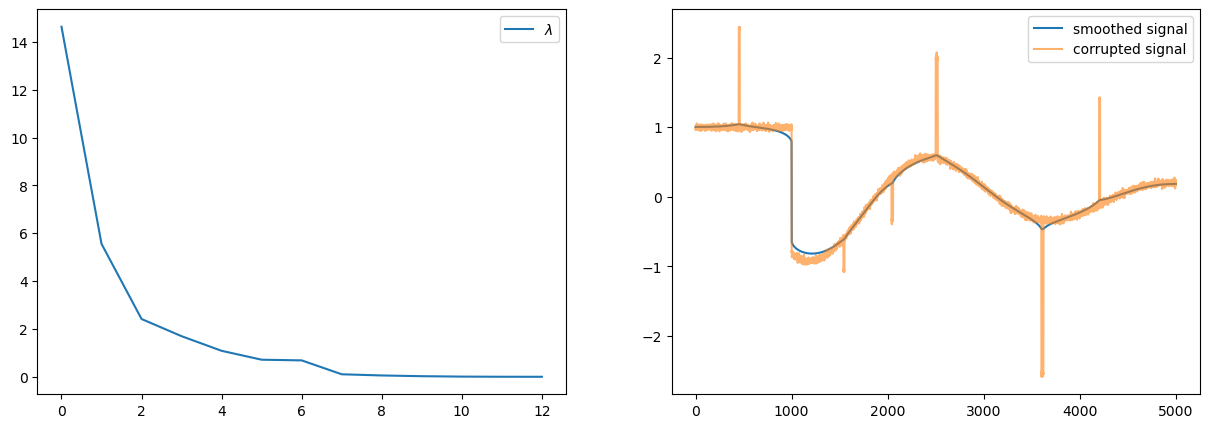

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(newton_dec, label='$\lambda$')
axs[0].legend()
axs[1].plot(np.array(x.detach()), label='smoothed signal')
axs[1].plot(xcor, label='corrupted signal',alpha=0.6)
axs[1].legend()
plt.show()

In [5]:
from NewtonSolver import NewtonSolver
f = lambda x : torch.linalg.norm(x - xcor, 2) ** 2\
    + MU * torch.sum(torch.sqrt(EPSILON ** 2 + (x[1:] - x[:-1]) ** 2) - EPSILON)
problem = NewtonSolver(f, torch.tensor(np.zeros(n)))
ans = problem.solve()

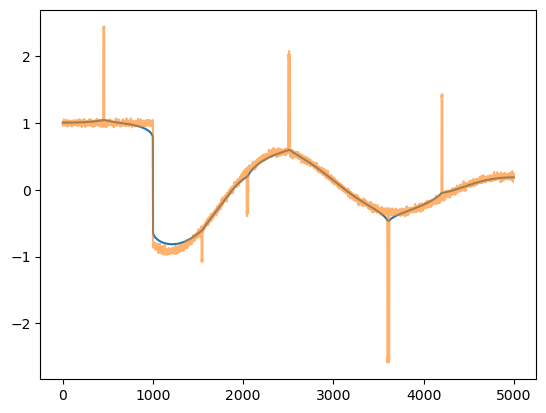

In [6]:
plt.plot(np.array(ans.detach()))
plt.plot(xcor,alpha=0.6)